# Exploratory Data Analysis (EDA) for Netflix titles
This dataset consists of tv shows and movies available on Netflix as of 2019

In [249]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)
library(cowplot)
df <- read_csv("netflix_titles.csv")
head(df)

Parsed with column specification:
cols(
  show_id = col_double(),
  type = col_character(),
  title = col_character(),
  director = col_character(),
  cast = col_character(),
  country = col_character(),
  date_added = col_character(),
  release_year = col_double(),
  rating = col_character(),
  duration = col_character(),
  listed_in = col_character(),
  description = col_character()
)


show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
80117401,Movie,Jandino: Whatever it Takes,NA,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
70234439,TV Show,Transformers Prime,NA,"Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
80058654,TV Show,Transformers: Robots in Disguise,NA,"Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."
80163890,TV Show,Apaches,NA,"Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanish-Language TV Shows",A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.


By creating a fig() function, we can scale the plot with ease by specifying (Width, Height) of the graphing window

In [250]:
#Create function for ggplot scaling
fig <- function(width, height){
     options(repr.plot.width = width, repr.plot.height = height)
}

### Summary of netflix data

In [251]:
summary(df)

    show_id             type              title             director        
 Min.   :  247747   Length:6234        Length:6234        Length:6234       
 1st Qu.:80035802   Class :character   Class :character   Class :character  
 Median :80163367   Mode  :character   Mode  :character   Mode  :character  
 Mean   :76703679                                                           
 3rd Qu.:80244889                                                           
 Max.   :81235729                                                           
     cast             country           date_added         release_year 
 Length:6234        Length:6234        Length:6234        Min.   :1925  
 Class :character   Class :character   Class :character   1st Qu.:2013  
 Mode  :character   Mode  :character   Mode  :character   Median :2016  
                                                          Mean   :2013  
                                                          3rd Qu.:2018  
                       

### Gaussian distribution of netflix title release dates and ratings
* Netflix has a low standard deviation, skewing left, signaling that majority of the movies and TV shows are released later on
* The general rating is the most frequent rating, with NC-17 (Restricted 17) being second
* Suprisingly, there are few outliers in 1925

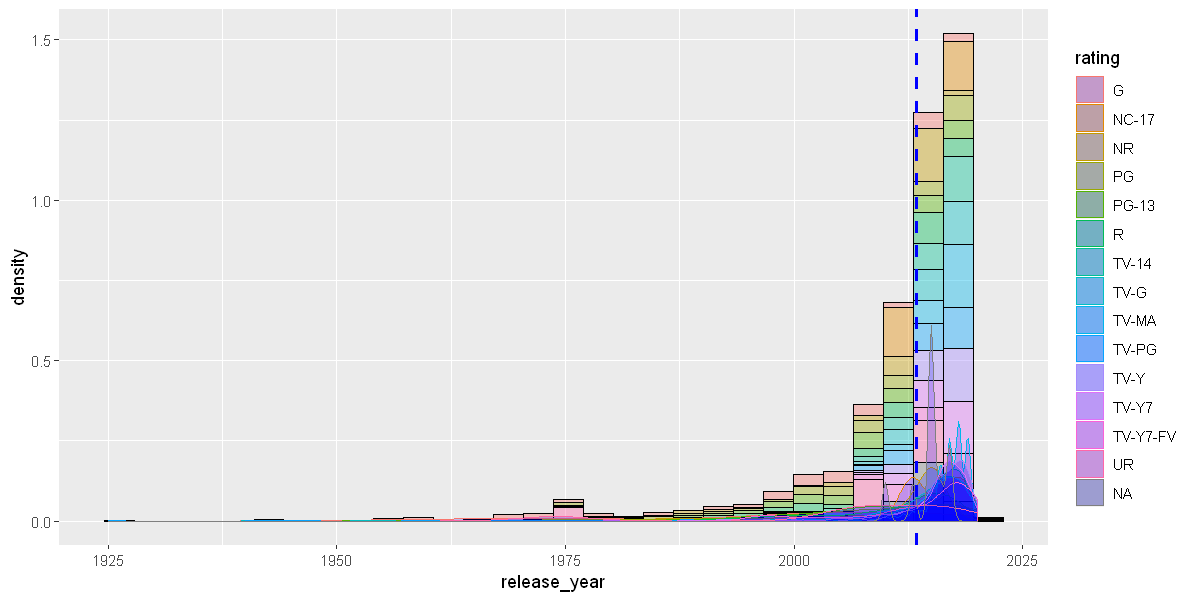

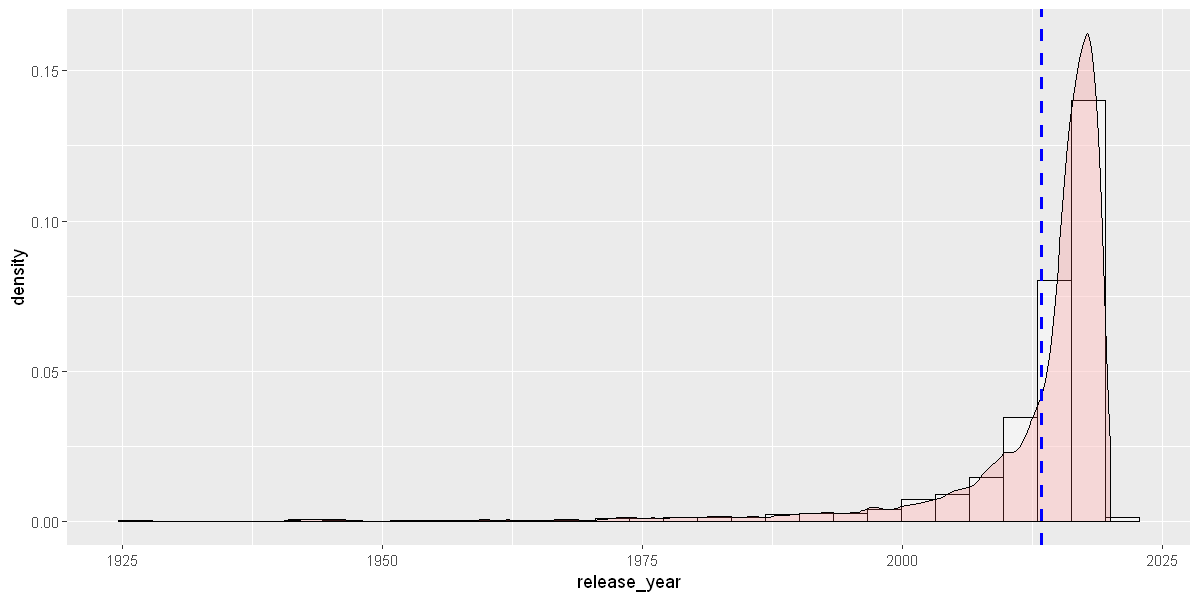

In [252]:
fig(10, 5)
p <- ggplot(df, aes(x = release_year, fill = rating, color = rating)) + 
    geom_histogram(aes(y = ..density..), color = "black", bins = 30, alpha = 0.4)+
    geom_density(alpha = .2, fill = "blue")

p + geom_vline(aes(xintercept=mean(release_year)),
            color="blue", linetype="dashed", size=1)

p <- ggplot(df, aes(x = release_year)) + 
    geom_histogram(aes(y = ..density..), fill = "white", color = "black", bins = 30, alpha = 0.4) +
    geom_density(alpha = .2, fill = "#FF6666")

p + geom_vline(aes(xintercept=mean(release_year)),
            color="blue", linetype="dashed", size=1)

### Netflix title media type
We can see that there are a lot more movies than TV shows in netflix, and ever since Netflix's streaming service started, movies were added way more than TV shows 

type,n
Movie,4265
TV Show,1969


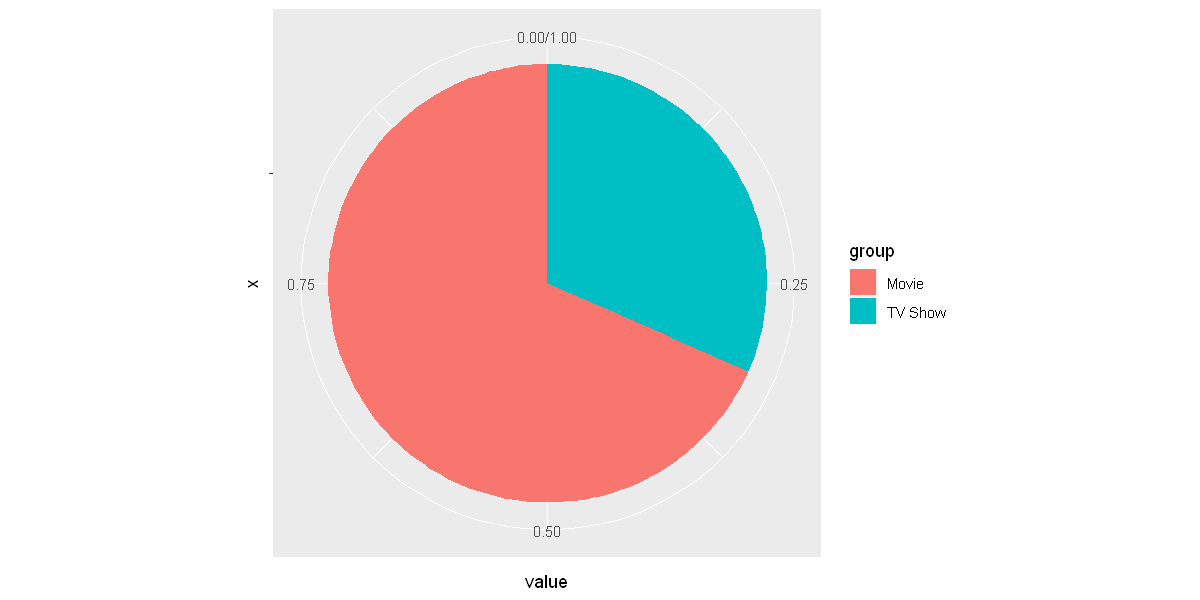

In [253]:
#Finding the distribution of numbers
df %>% count(type)
dt = data.frame(
    group = c("Movie", "TV Show"),
    value = c(4265/(4265+1969), 1969/(4265+1969)))
#creating a pie chart through a bar plot
bp<- ggplot(dt, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start = 0)
pie

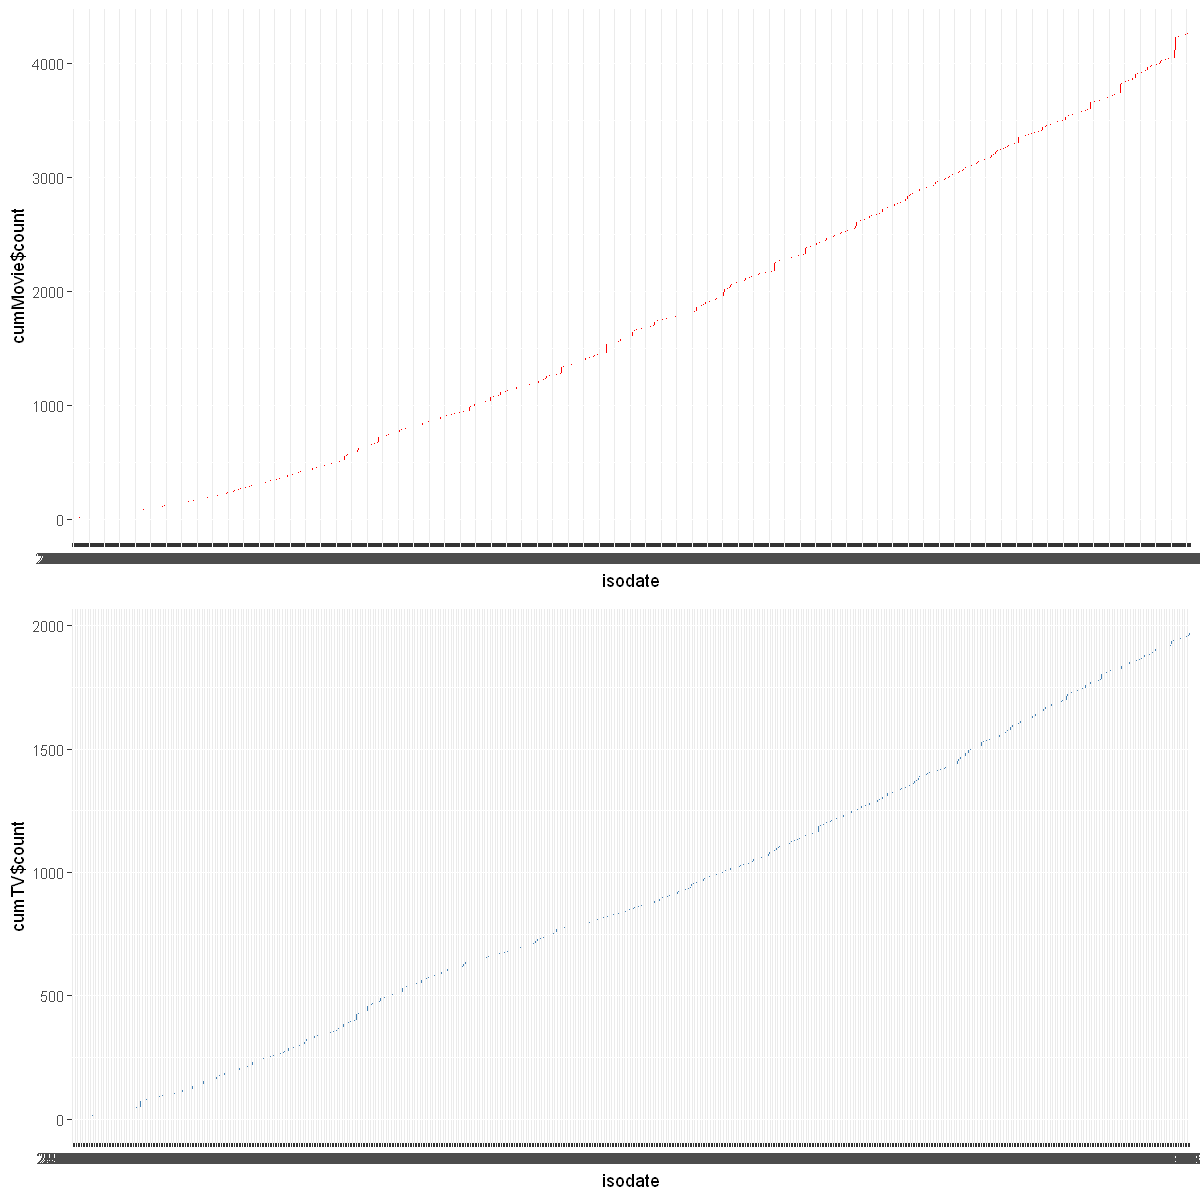

In [261]:
#Formatting the date_added to ISO 8601:2004 format
df$isodate <- strptime(as.character(df$date_added), "%B %d, %Y")
df$isodate <- format(df$isodate, "%Y-%m-%d")

#create cumMovie and cumTV to store the data count
cumType <- df %>% select(isodate, type)%>%group_by(type)%>%mutate(count = row_number())
cumType <- cumType[order(as.Date(cumType$isodate, format="%Y-%m-%d")),]

#Filter out movie and tv
cumMovie <- cumType %>% filter(type == "Movie")
cumTV <- cumType %>% filter(type == "TV Show")

cumMovie <- cumMovie %>% select(isodate, type)%>%mutate(count = row_number())
cumTV <- cumTV %>% select(isodate, type) %>%mutate(count = row_number())

#Plot graph
g1 <- ggplot(cumMovie, aes(x = isodate)) +
    geom_line(aes(y = cumMovie$count), color = "red")

g2 <- ggplot(cumTV, aes(x = isodate)) + 
    geom_line(aes(y = cumTV$count), color = "steelblue")

plot_grid(g1, g2, nrow = 2, ncol = 1)

### Target ages and genres

The top 5 most frequent category that appears are all for audiences other than children, while number 6 to 10th are all for children, showing that netflex is geared more towards teens and adults rather than children.

listed_in,n
Documentaries,299
Stand-Up Comedy,273
"Dramas, International Movies",248
"Dramas, Independent Movies, International Movies",186
"Comedies, Dramas, International Movies",174
Kids' TV,159
"Documentaries, International Movies",150
"Children & Family Movies, Comedies",129
Children & Family Movies,120
"Comedies, International Movies",120


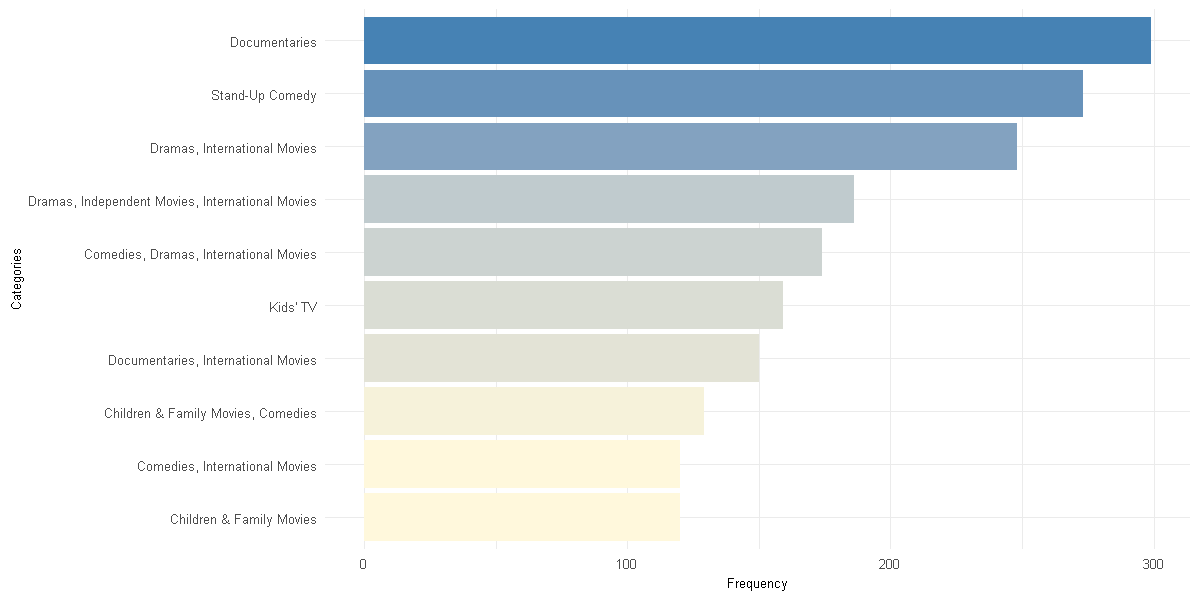

In [255]:
#Set graphic window
fig(10, 5)
df %>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "cornsilk", high = "steelblue")

df %>%
    group_by(listed_in)%>%
    count(sort = T)%>%
    head(10)

### Content by country
While there are collaborations between countries, the majority of the contents are main by countries by themselves. The data shows that majority of the contents in netflix are made in United States

country,n
United States,2032
India,777
NA,476
United Kingdom,348
Japan,176
Canada,141
South Korea,136
Spain,117
France,90
Mexico,83


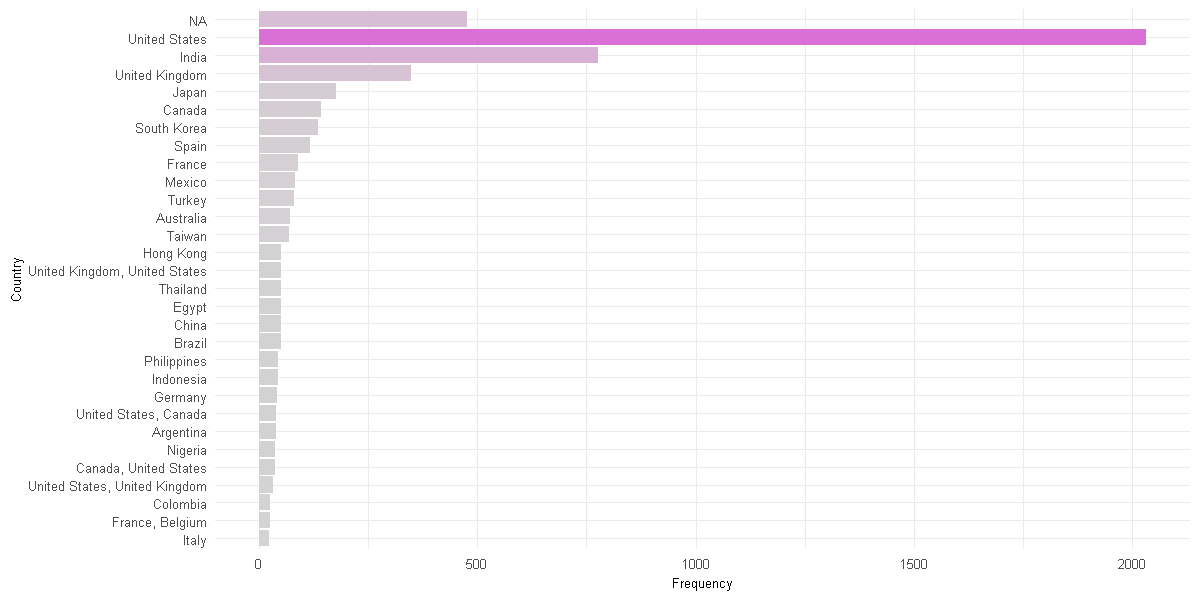

In [256]:
df %>%
    count(country, sort = TRUE)%>%
    head(30) %>%
    ggplot(aes(reorder(country, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    labs(y = "Frequency", x = "Country")+
    scale_fill_gradient(low = "lightgray", high = "orchid")

df %>%
    group_by(country)%>%
    count(sort = T)%>%
    head(30)

### Top five country's content distribution
A few key points:
* United states produced over 200 documentaries on Netflix, beating other countries by a wide margin
* Japan mainly produces anime, with 9/10 of their top 10 categories involving anime
* India mainly produces dramas and movies
* Canada produces more children friendly content compared to other categories
* United Kingdom produces more serious content compared to other countries, with their top two categories being documentaries and docusaries

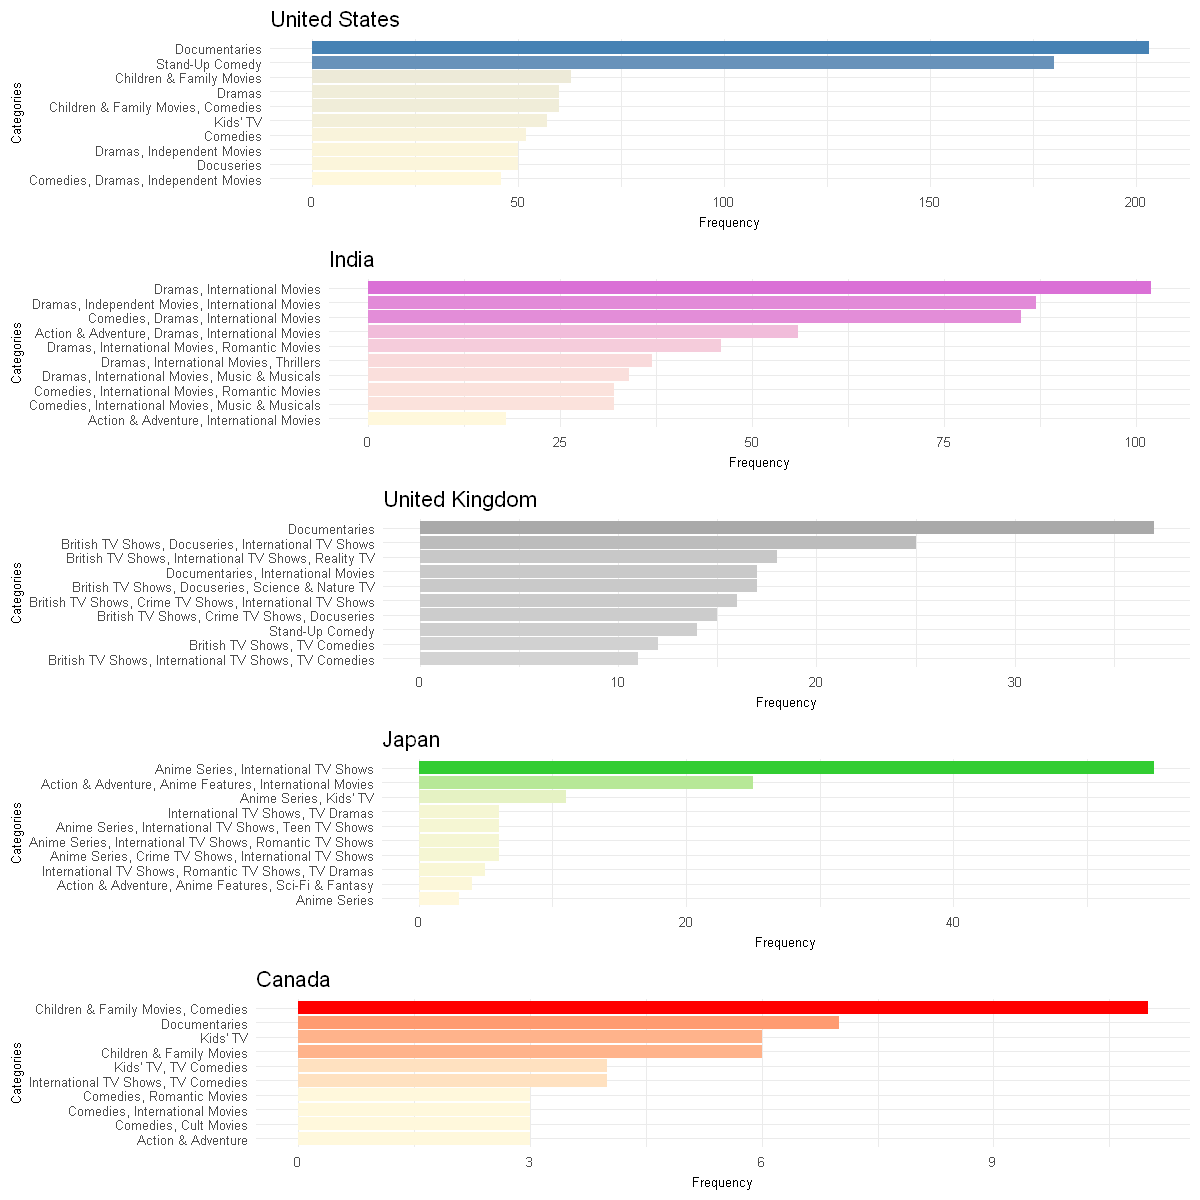

In [257]:
#Setting figure size
fig(10, 10)

g1 <- df %>%
    filter(country == 'United States')%>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    ggtitle("United States")+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "cornsilk", high = "steelblue")

g2 <- df %>%
    filter(country == 'India')%>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    ggtitle("India")+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "cornsilk", high = "orchid")

g3 <- df %>%
    filter(country == 'United Kingdom')%>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    ggtitle("United Kingdom")+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "lightgrey", high = "darkgrey")

g4 <- df %>%
    filter(country == 'Japan')%>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    ggtitle("Japan")+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "cornsilk", high = "limegreen")

g5 <- df %>%
    filter(country == 'Canada')%>%
    count(listed_in, sort = TRUE)%>%
    head(10) %>%
    ggplot(aes(reorder(listed_in, n), n, fill=n))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    theme_minimal()+
    theme(axis.text = element_text(size = 8), axis.title = element_text(size = 8))+
    ggtitle("Canada")+
    labs(y = "Frequency", x = "Categories")+
    scale_fill_gradient(low = "cornsilk", high = "red")

plot_grid(g1, g2, g3, g4, g5, nrow = 5, ncol = 1)